In [1]:
import galsim
import anacal
import numpy as np

2023/09/09 16:56:04 ---  Processing for g1-2222, and shears for four redshift bins are [0.03 0.03 0.03 0.03].
2023/09/09 16:56:04 ---  Making Basic Simulation. ID: 212


zero magnitude is: 27.00
pixel scale is 0.17 arcsec


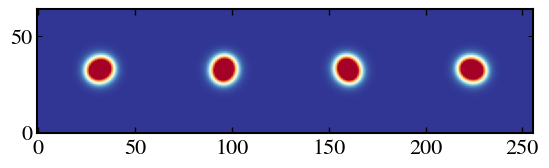

In [2]:
scale = 0.168
nx, ny = 64, 64
# Define PSF object with Galsim
psf_obj = galsim.Moffat(
    beta=3.5, fwhm=0.6, trunc=0.6 * 4.0
).shear(e1=0.02, e2=-0.02)

seed = 212
gname = "g1-2222"
shear_value = 0.03
data_obj = anacal.simulation.make_isolate_sim(
    shear_value=shear_value, # amplitude of shear distortion
    gal_type="basic",        # galaxy simulation type
    psf_obj=psf_obj,         # Galsim PSF object
    gname=gname,             # redshift dependence of shear
    seed=seed,               # random seed
    ny=ny * 1,               # height of the simulation
    nx=nx * 4,               # width of the simulation
    scale=scale,             # pixel scale
    do_shift=False,          # whether include subpixel shifting of galaxy centroid
    nrot=4,                  # number of rotation by pi/nrot (ring test)
)
print("zero magnitude is: %.2f" %data_obj.mag_zero)
print("pixel scale is %.2f arcsec" %data_obj.scale)
# plot the image
anacal.plotter.make_plot_image(data_obj.image)

In [3]:
# define the method used for shear estimation
method_obj = anacal.dtype.FPFSMethod(
    sigma_as=0.5,        # smoothing scale for shape estimation
    sigma_det=0.5,       # smoothing scale for detection
    rcut=32,             # radius of the stamp 
    nnord=4,             # order of shapelets
    noise_rev=False,     # whether do noise bias correction
)
cat_obj = anacal.process.process_image(data_obj, method_obj)
# test the wrapped impt.FPFS function

outcome = anacal.process.measure_shear(cat_obj, method_obj)
shear1 = np.sum(outcome[:, 0]) / np.sum(outcome[:, 1])
print("input g1 is %.5f" % shear_value)
print("measured g1 is %.5f" % shear1)

shear2 = np.sum(outcome[:, 2]) / np.sum(outcome[:, 3])
print("input g2 is 0.")
print("measured g2 is %.5f" % shear2)

2023/09/09 16:56:05 ---  Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023/09/09 16:56:05 ---  Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023/09/09 16:56:05 ---  Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023/09/09 16:56:05 ---  Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023/09/09 16:56:05 ---  No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
2023/09/09 16:56:06 ---  Order of the shear estimator: nnord=4
2023/09/09 16:56:06 ---  Shapelet kernel in configuration space: sigma= 0.5000 arcsec
2023/09/09 16:56:06 ---  Detection kernel in configuration space: sigma= 0.5000 arcsec
2023/09/09 16:56:07 ---

input g1 is 0.03000
measured g1 is 0.02998
input g2 is 0.
measured g2 is 0.00000
